# Importing dependencies

In [6]:
#basic libraries

import numpy as np
import pandas as pd

#visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

# Exploring dataset

## Data Structure

- Loading dataset from csv file

In [7]:
df = pd.read_csv("./dataset.csv")

- See the rows of the dataset to get an overview of the data structure

In [9]:
df.head()

,Price,Street,Area,City,Type,Bedrooms,Bathrooms,Size(Sq. Ft.),Parking Space,Balcony or Terrace,Double Glazed Windows,Maintenance Staff,View,Pet Policy,Lobby in Building,Family or Bachelor,Rent Year
0,17000,Section 2,Mirpur,Dhaka,Apartment,3,3,1120,Yes,Yes,Yes,Yes,North,No,Yes,Yes,2017
1,12000,Goran,Khilgaon,Dhaka,Room,2,2,730,No,No,No,No,North,No,No,Yes,2018
2,24000,Free School Street,Kathalbagan,Dhaka,Apartment,3,2,1100,Yes,Yes,Yes,Yes,East,Yes,Yes,Yes,2018
3,13720,Donia,Jatra Bari,Dhaka,Room,2,2,930,No,No,Yes,Yes,East,No,No,Yes,2017
4,32000,Sector 6,Uttara,Dhaka,Duplex,4,4,1965,Yes,Yes,Yes,No,East,No,Yes,Yes,2018


- See the dataset column null values and column types of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3504 entries, 0 to 3503
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Price                  3504 non-null   int64 
 1   Street                 3504 non-null   object
 2   Area                   3504 non-null   object
 3   City                   3503 non-null   object
 4   Type                   3504 non-null   object
 5   Bedrooms               3504 non-null   int64 
 6   Bathrooms              3504 non-null   int64 
 7   Size(Sq. Ft.)          3504 non-null   int64 
 8   Parking Space          3504 non-null   object
 9   Balcony or Terrace     3504 non-null   object
 10  Double Glazed Windows  3504 non-null   object
 11  Maintenance Staff      3504 non-null   object
 12  View                   3504 non-null   object
 13  Pet Policy             3504 non-null   object
 14  Lobby in Building      3504 non-null   object
 15  Family or Bachelor   

- See how many null there are in the dataset before starting the data analysis

In [10]:
df.isnull().sum()

Price                    0
Street                   0
Area                     0
City                     1
Type                     0
Bedrooms                 0
Bathrooms                0
Size(Sq. Ft.)            0
Parking Space            0
Balcony or Terrace       0
Double Glazed Windows    0
Maintenance Staff        0
View                     0
Pet Policy               0
Lobby in Building        0
Family or Bachelor       0
Rent Year                0
dtype: int64

- See the value types of each column to analyze the dataset features

In [41]:
list_col = df.columns
values_col = []
for colIndex, col in enumerate(list_col): 
    if (len(df[col].unique()) > 10): values_col = '{} {}'.format(len(df[col].unique()), 'values')
    else: values_col = df[col].unique()
    print('{}. {}: {}'.format(colIndex + 1, col, values_col))

1. Price: 137 values
2. Street: 304 values
3. Area: 51 values
4. City: [' Dhaka' ' Badda' nan ' Malibagh' ' Banasree']
5. Type: ['Apartment' 'Room' 'Duplex' 'd']
6. Bedrooms: [3 2 4 1 5]
7. Bathrooms: [3 2 4 1 5 6]
8. Size(Sq. Ft.): 269 values
9. Parking Space: ['Yes' 'No']
10. Balcony or Terrace: ['Yes' 'No']
11. Double Glazed Windows: ['Yes' 'No']
12. Maintenance Staff: ['Yes' 'No']
13. View: ['North' 'East' 'West' 'South' 'west']
14. Pet Policy: ['No' 'Yes']
15. Lobby in Building: ['Yes' 'No']
16. Family or Bachelor: ['Yes' 'No']
17. Rent Year: [2017 2018 2016]


In [9]:
df['Street'].value_counts()

Street
Block J             102
Block F             100
Section 6            84
Section 11           83
East Kazipara        76
                   ... 
Petrol Pump Road      1
Arjatpara             1
Uttar Para            1
Tekpara               1
Ibrahimpur            1
Name: count, Length: 304, dtype: int64

In [10]:
df['Area'].value_counts()

Area
 Mirpur                715
 Uttara                320
 Badda                 199
 Khilgaon              184
 Banasree              181
 Jatra Bari            179
 Dakshin Khan          146
 Mohammadpur           115
 Tejgaon               114
 Bashundhara R/A       108
 Baridhara             107
 Maghbazar              79
 Dhanmondi              76
 Kalabagan              73
 Adabor                 66
 Rampura                60
D.I.T. Project          57
 Gulshan                56
 Sutrapur               52
 Nikunja                49
 Kafrul                 45
 Lalbagh                43
 Kathalbagan            37
 Shantinagar            35
 Ibrahimpur             34
 Hatirpool              34
 Hazaribag              32
 Shyamoli               32
 Khilkhet               31
 Mohakhali              30
 Cantonment             28
 Banani                 27
 Lalmatia               27
 Bashabo                24
 North Shahjahanpur     17
 Motijheel              15
 Malibagh              

In [11]:
df['City'].value_counts()

City
 Dhaka       3441
 Badda         57
 Malibagh       3
 Banasree       2
Name: count, dtype: int64

## Data Preparation

- Cleaning nan values and extra spaces in the column City
- Because all the rows belongs to one city "Dhaka" we can drop the column is not a relevant data for our analysis
- We delete the rows with the value 'd' because this value is not relevant for our analysis.

In [129]:
df['City'].replace([' Dhaka'], 'Dhaka', inplace = True)
df['View'].replace(['west'], 'West', inplace = True)
df = df.drop(df[df['City'] != 'Dhaka'].index)
df = df.drop(df[df['Type'] == 'd'].index)
df.drop(columns=['City'], inplace = True)

## Data Analysis

- After do a dataset exploration we are going to try to understand how the features influence the house price
- First we are going to get the range of house prices to know what are the maximum, minumum and median values in the dataset, based in these values we can analyze the dataset features
- Based on the info below we can see the mean is $2000 so most of the house prices are around that price, based on this we are going to see how the features are related with the house price.

In [156]:
df['Price'].describe()

count      3440.000000
mean      20356.489244
std       16641.359474
min        4000.000000
25%       12000.000000
50%       16000.000000
75%       23000.000000
max      300000.000000
Name: Price, dtype: float64

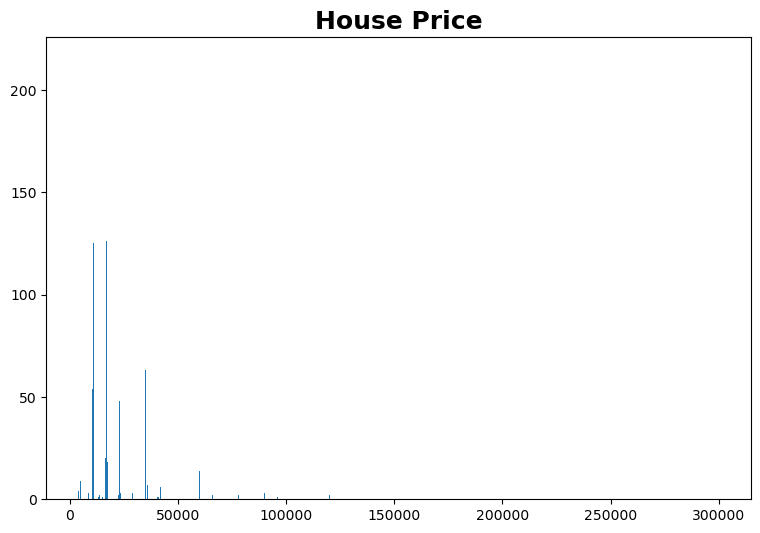

In [154]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
plt.hist(df['Price'], bins = df['Price'].count())
plt.title('House Price', fontsize=18, fontweight='bold')

plt.show()


- Let's see how the house price has changed among the years in the dataset, as you can see below the year does not have change too much so this feature is not important for our analysis.

In [2]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.barplot(x = 'Rent Year', y = 'Price', data = df, palette = 'coolwarm')
plt.title('Houses Per Year', fontsize=18, fontweight='bold')

plt.show()

NameError: name 'plt' is not defined

- We are going to see how the house size influence the price, as you can see below it is strongly influence by the price and most of the data are in the price range of ($1000-$5000) and house size of (500-2000) square fit.

/Users/jnova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jnova/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


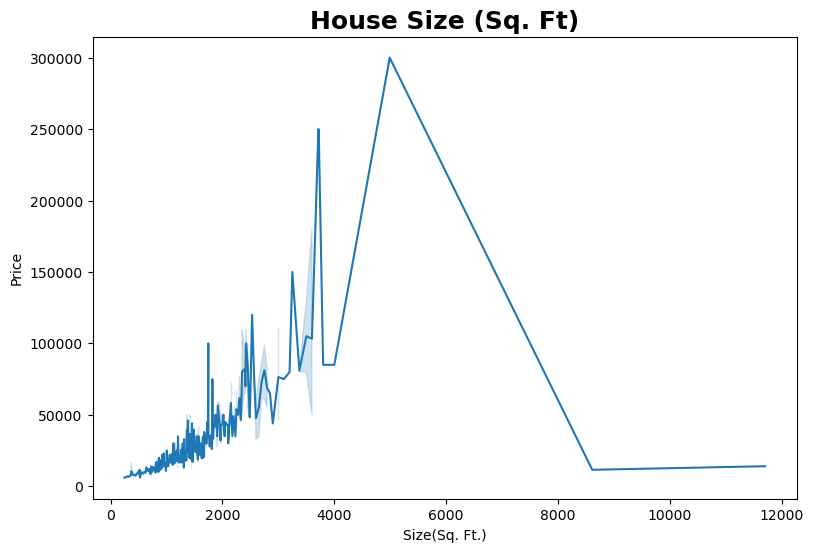

In [137]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.lineplot(x = 'Size(Sq. Ft.)', y = 'Price', data = df)
plt.title('House Size (Sq. Ft)', fontsize=18, fontweight='bold')

plt.show()

- Now we are going to see how the house type and house view infuence the price:
- We have three house types, we can see the most expensive are the duplex, but the apartments are in the mean of the house price and most of the data are apartaments.
- We can see that the three views are not too far each other and they are in the mean house price so none of those influence strongly the house price.

In [153]:
df['Type'].value_counts()

Type
Apartment    2815
Room          587
Duplex         38
Name: count, dtype: int64

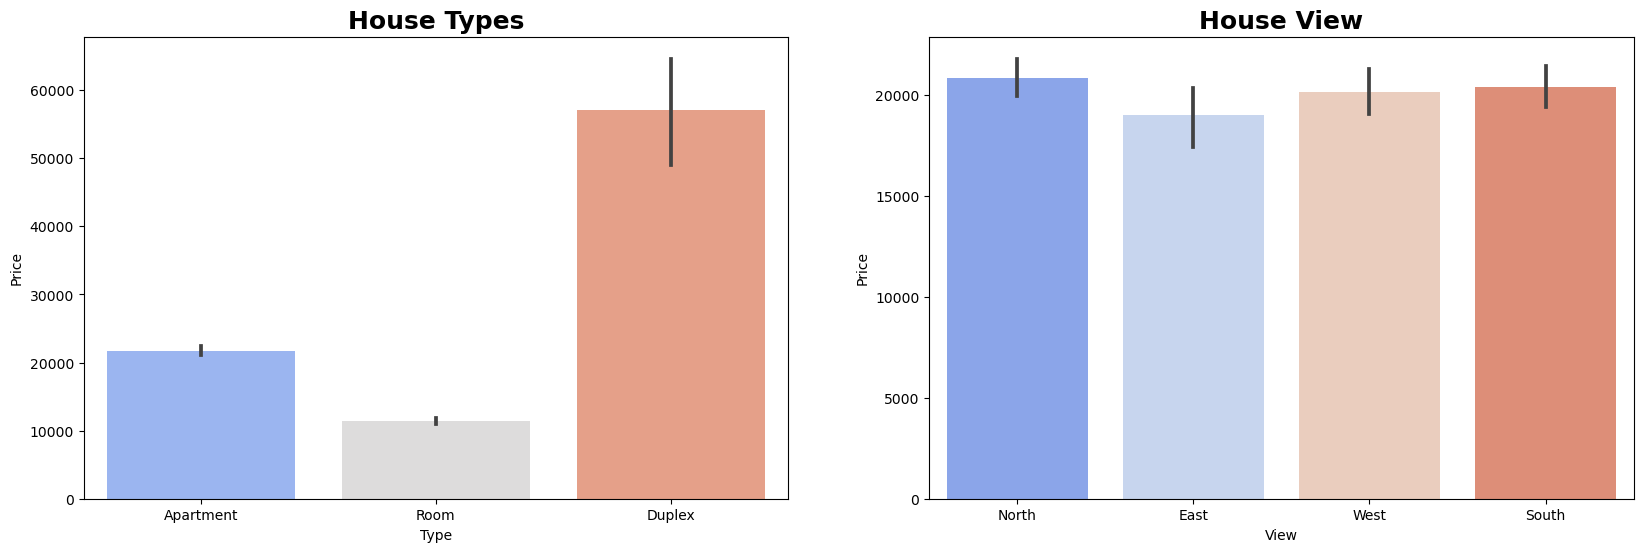

In [97]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.barplot(x = 'Type', y = 'Price', data = df, palette = 'coolwarm')
plt.title('House Types', fontsize=18, fontweight='bold')

plt.subplot(1,2,2)
sns.barplot(x = 'View', y = 'Price', data = df, palette = 'coolwarm')
plt.title('House View', fontsize=18, fontweight='bold')

plt.show()

- We can see below that the house price is highly influenced by the number of beedrooms and bathrooms so the highest house price are when in the houses with more beedrooms and bathrooms.
- We can see that houses with 2 beedrooms or bathrooms are in the mean house price, also that if the house have more beedrooms and bathrooms the house price increase.

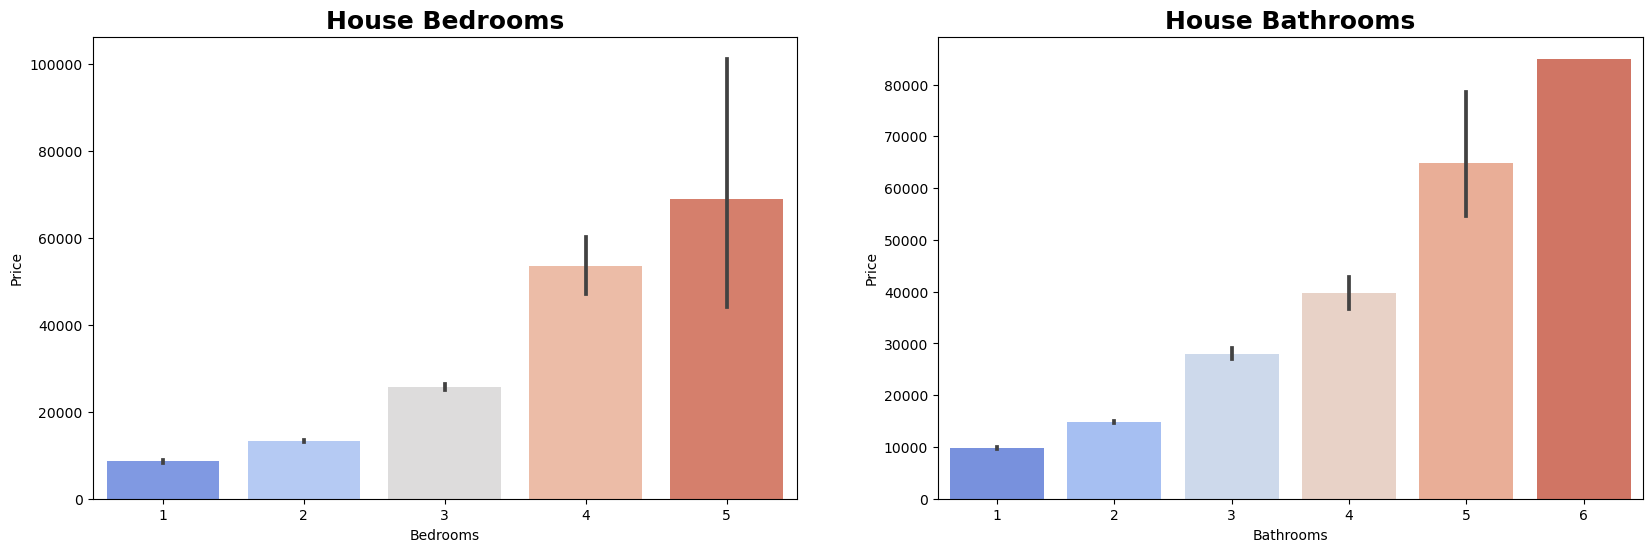

In [98]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.barplot(x = 'Bedrooms', y = 'Price', data = df, palette = 'coolwarm')
plt.title('House Bedrooms', fontsize=18, fontweight='bold')

plt.subplot(1,2,2)
sns.barplot(x = 'Bathrooms', y = 'Price', data = df, palette = 'coolwarm')
plt.title('House Bathrooms', fontsize=18, fontweight='bold')

plt.show()

- We are going to see how the are influence the house price, as you can see below most of the areas influece the price quite similat except some og them for example (Guishan, Baridhara R/A, Baridhara,  Banani and Shiddheswari)

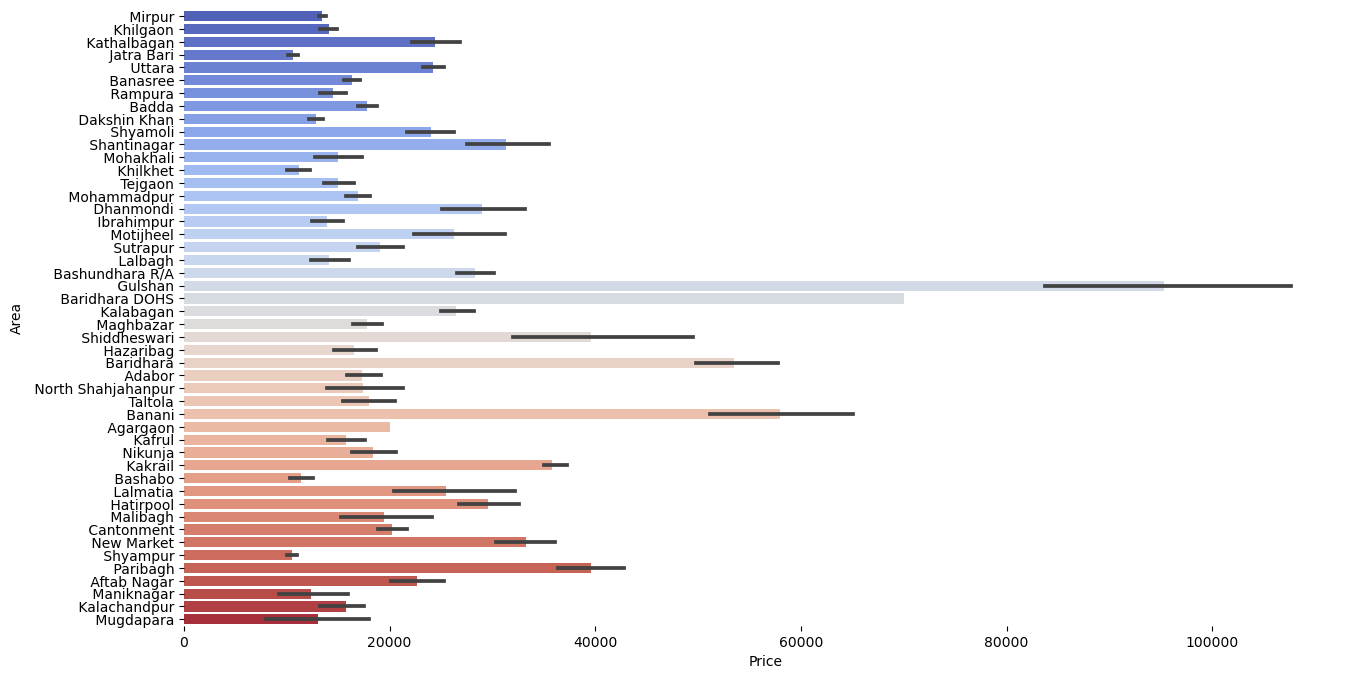

In [115]:
plt.figure(figsize=(15,8))
sns.barplot(x="Price", y="Area", data=df, label="Area", palette='coolwarm')
sns.despine(left=True, bottom=True)

plt.show()

- We are going to see how the street influence the house price, as you can see below most of the streets influence the price similar except some of them, i would say that there are like a 15% of the areas when the house price is very high.

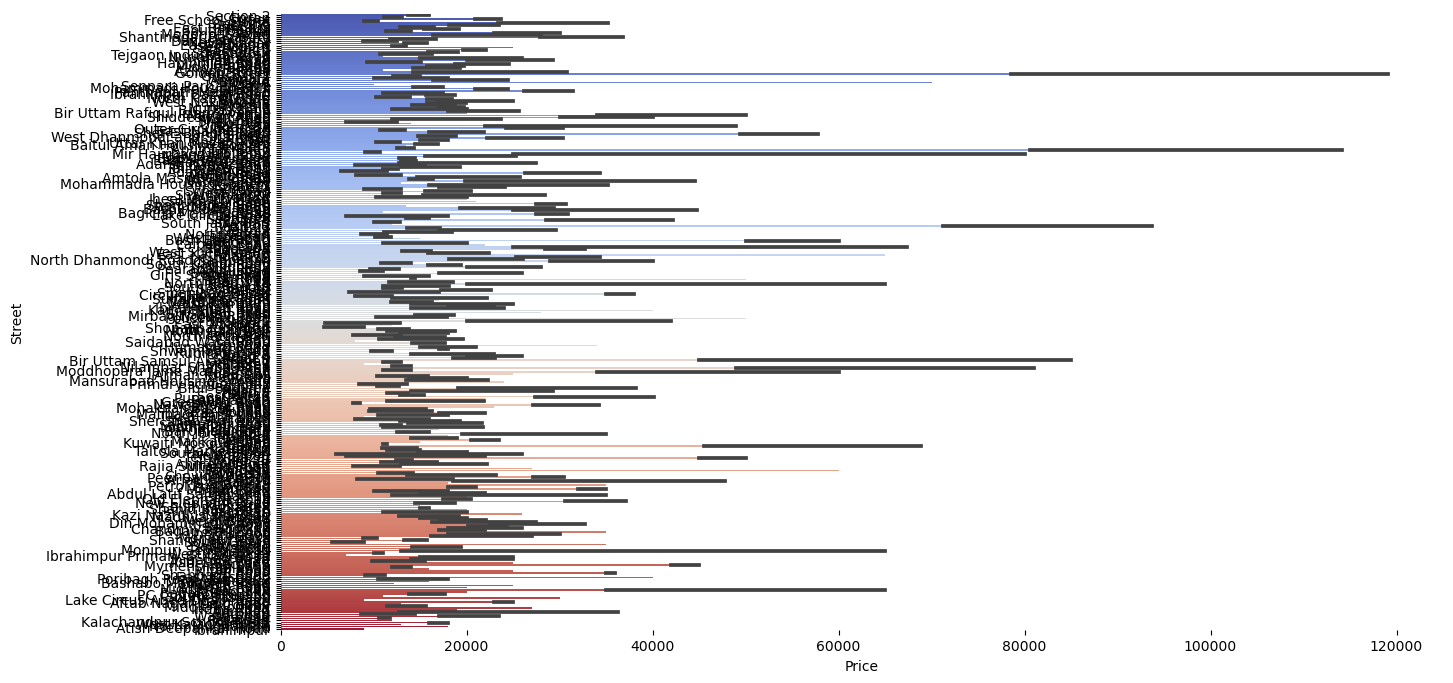

In [116]:
plt.figure(figsize=(15,8))
sns.barplot(x="Price", y="Street", data=df, label="Street", palette='coolwarm')
sns.despine(left=True, bottom=True)

plt.show()

- We can see that most of the features are house ammenities like (Parking Space, Balcony or Terrace, Double Glazed Windows, Maintenance Staff, View, Pet Policy, Lobby in Building, Family or Bachelor), so we are going to evaluate how those ammenities influence the house price.
- As you can seee below the amenities that most increase the house price are (Pet Policy and Lobby in Building)

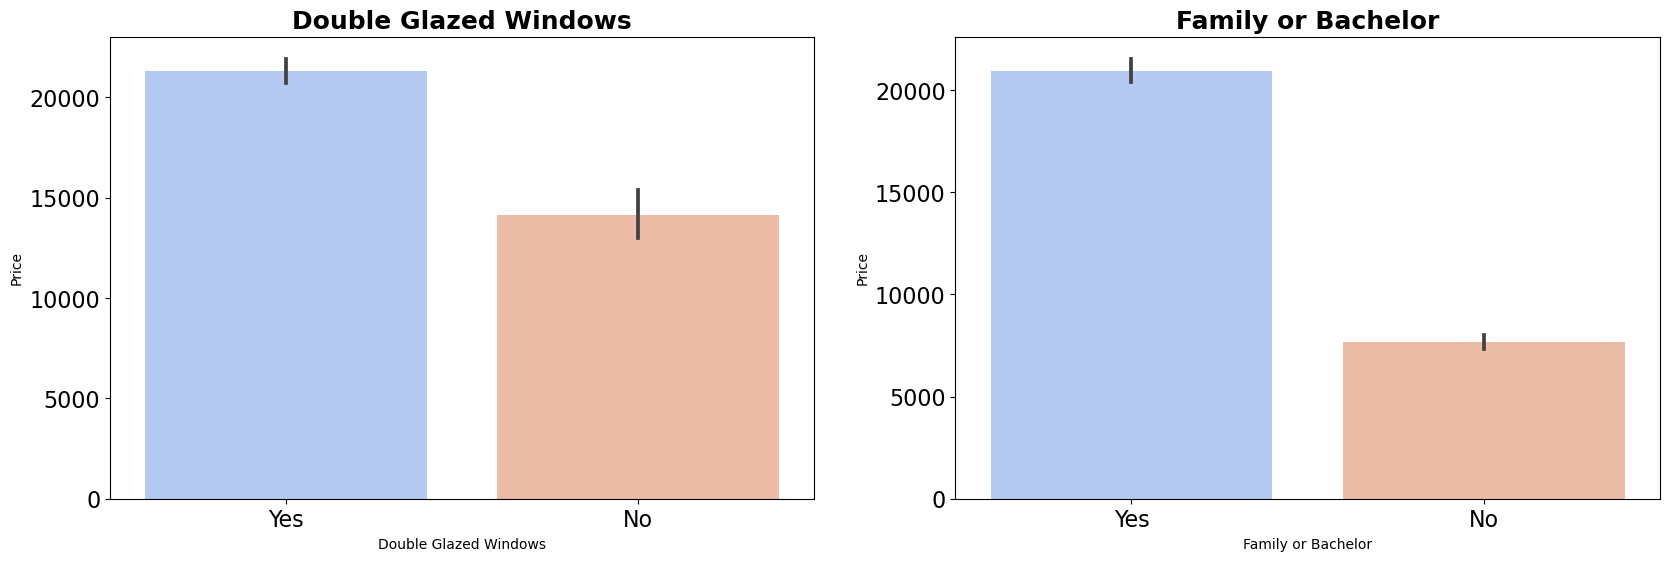

In [133]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
sns.barplot(x = 'Double Glazed Windows', y = 'Price', data = df, palette='coolwarm')
plt.title('Double Glazed Windows', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.barplot(x = 'Family or Bachelor', y = 'Price', data = df, palette='coolwarm')
plt.title('Family or Bachelor', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

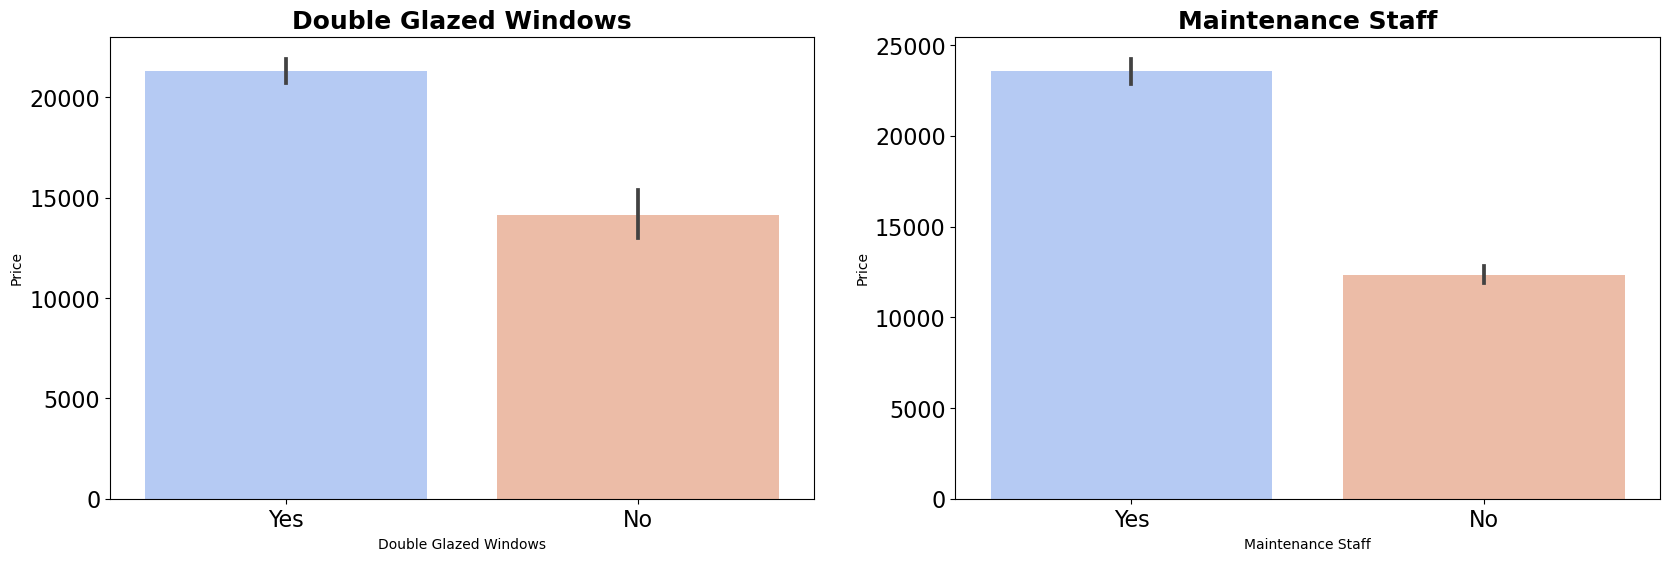

In [132]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
sns.barplot(x = 'Double Glazed Windows', y = 'Price', data = df, palette='coolwarm')
plt.title('Double Glazed Windows', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.barplot(x = 'Maintenance Staff', y = 'Price', data = df, palette='coolwarm')
plt.title('Maintenance Staff', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

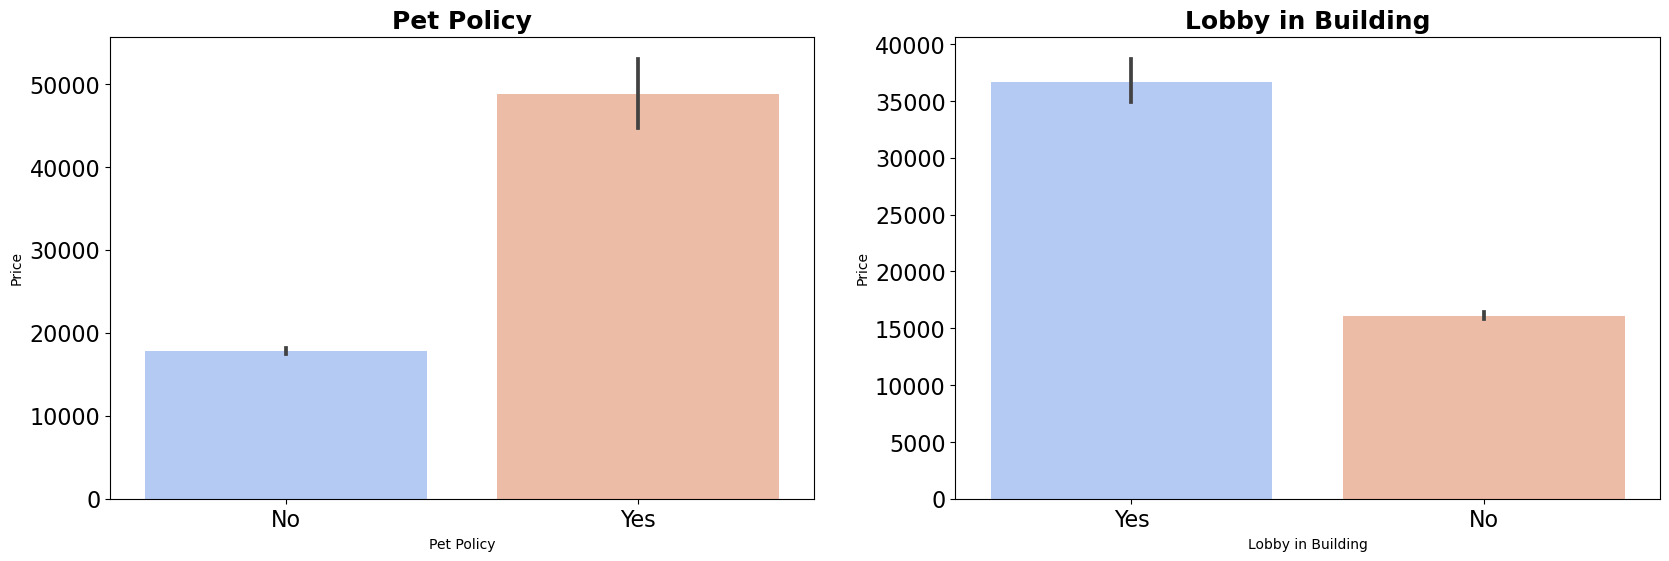

In [131]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
sns.barplot(x = 'Pet Policy', y = 'Price', data = df, palette='coolwarm')
plt.title('Pet Policy', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.subplot(1,2,2)
sns.barplot(x = 'Lobby in Building', y = 'Price', data = df, palette='coolwarm')
plt.title('Lobby in Building', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

- In order to build our correlation matrix data we need to see all the values and encode those who are not a number to see the correlation data properly.

In [21]:
list_col = df.columns

for col in list_col: 
    print('{} :{} ' . format(col.upper(),df[col].unique()))

PRICE :[ 17000  12000  24000  13720  32000  25000  16000  15000  14000  40000
   9000   8000  11000  13000  18000  20000  23000  26000  13500  17800
  45000  14500  19000  11500   7500  16500  12500  28000  22000  27000
  46000  35000  70000  10000  34000   6000   9900  20500   8500  10500
   9500  21000  17500   6500  50000  11800  55000  30000  85000   4000
  80000  15500  31000  66000  39500  25500  21500  15100  70500  75500
  75000 100000  65000  24500  37000  38000  33000   7000   6200  18500
   5000  60000  18150   5500  36000  17700 120000  49000  56000  82000
  44500  49500  29000  35500  42000 150000  67000  41000  57000   4700
  19500  23500  47000 106000  14100  52000  44000  48000  16300  60500
  77000   8700  40500  15400  22500  30500 180000  32500  13800  95000
  96000  45500  90000 110000  13300  78000  11200 250000   7150  33500
   9700  27500  19600  25600  20800 130000  15800 105000  54000 300000
   9800   7800  12200   9300  28500   8800  25003] 
STREET :['Section 

- Now, we are going to see the data correlation
- We have to encode the categorical data 
- We can see we have all the columns type object except the columns Price, Beedrooms, Bathrooms, Size and Rent Year
- We also have values Yes, No, North, Apartment which makes easier encode the values

In [118]:
from sklearn.preprocessing import LabelEncoder
object_cols = filter(lambda x: x not in ['Price', 'Bedrooms', 'Bathrooms', 'Size(Sq. Ft.)', 'Rent Year'], df.columns)
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

- Creating the correlation matrix data to see what features are most related with the column price that is out target column to predict

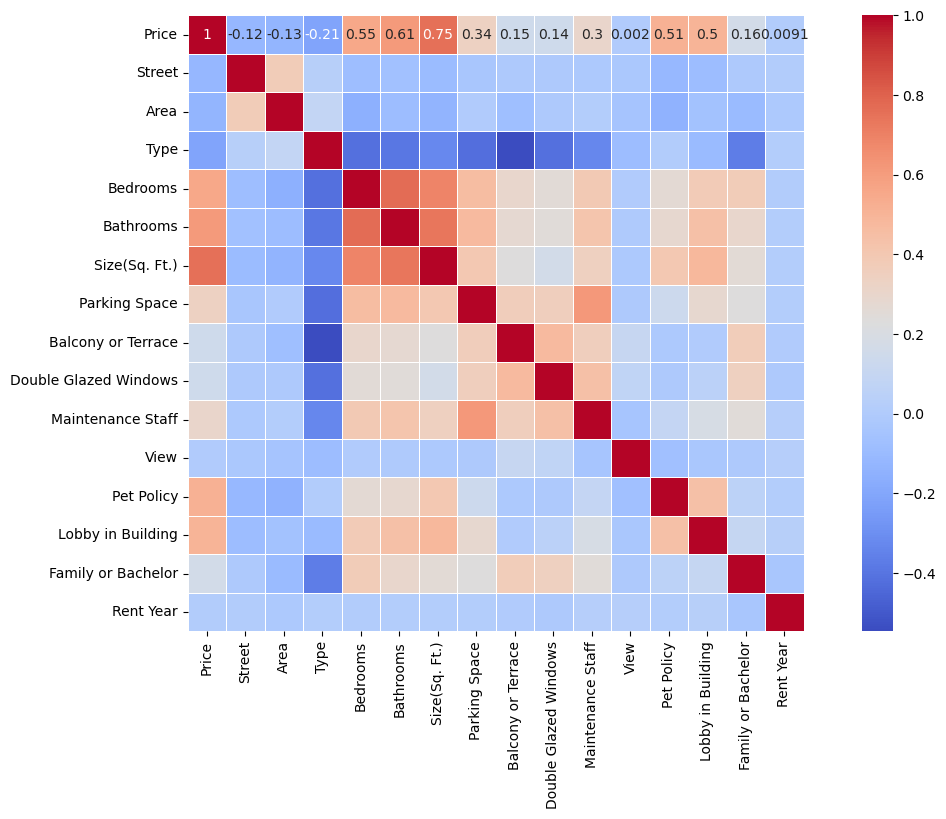

In [125]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5, square=True)
plt.show()

- Based on our correlation matrix and data analysis above we can conclude that the features most related with the house price are the columns (Size, bedrooms, bathrooms, pet policy and lobby in the building) respectively from the most related to the less related
- We are going to create some charts based on this information

- As you can see in the chart below the points are more red when the house size, price and number of beedrooms increase, most of the points are in the setup of 3 rooms, around $1000-$5000 price range and 200-2000 square feet.

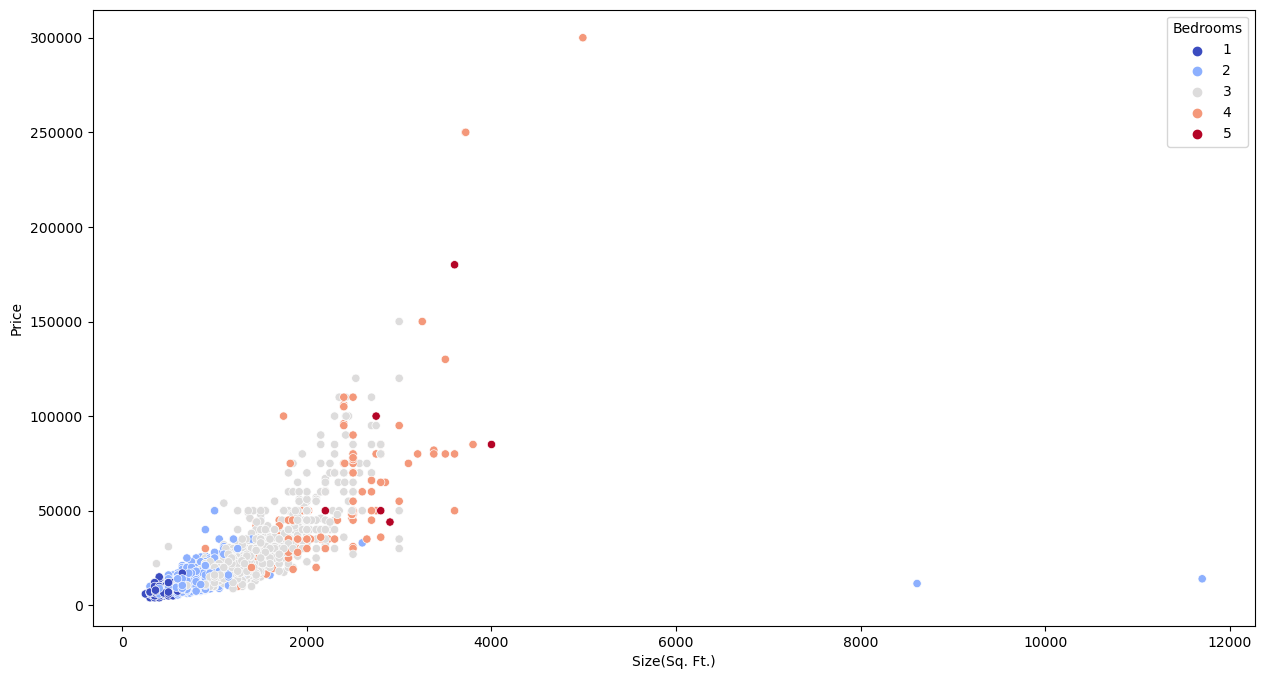

In [68]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['Size(Sq. Ft.)'], y=df['Price'], data=df, hue='Bedrooms', palette='coolwarm')
plt.show()

- As you can see in the chart below the points are more red when the house size, price and number of bathrooms increase, most of the points are in the setup of 2 or 4 bathrooms, around $1000-$5000 price range and 500-2000 square feet.

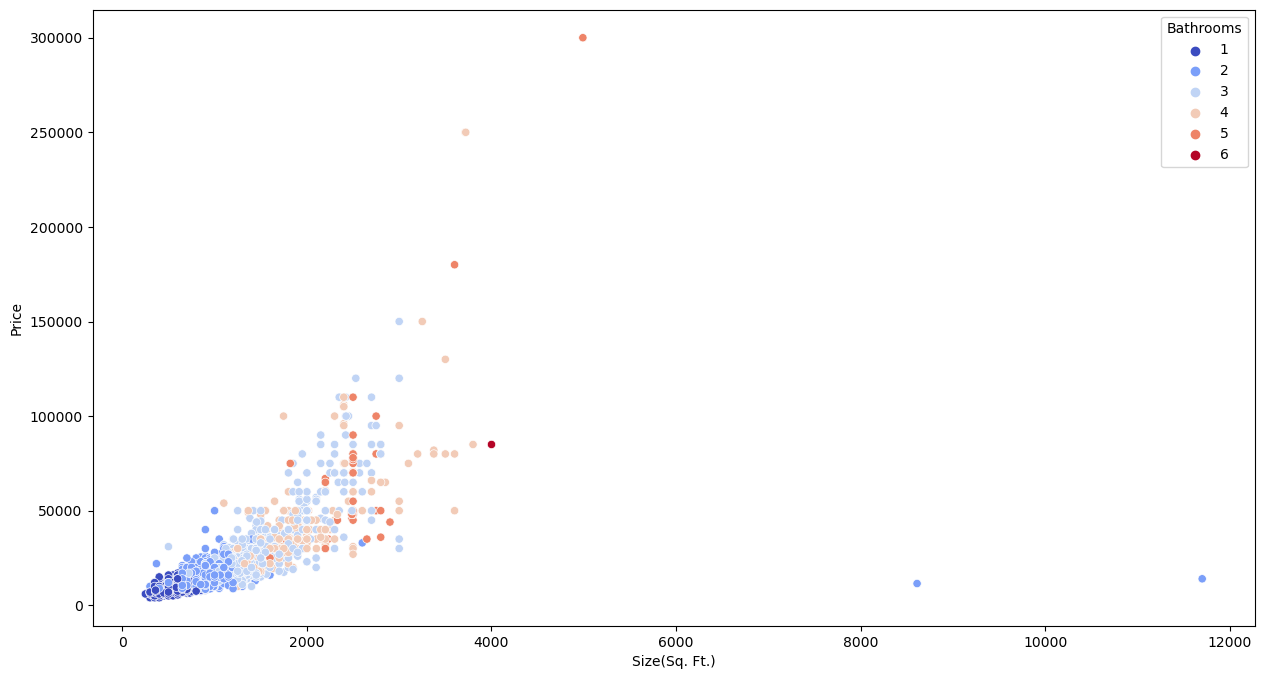

In [60]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['Size(Sq. Ft.)'], y=df['Price'], data=df, hue='Bathrooms', palette='coolwarm')
plt.show()

# Evaluating Models

- Loading train data and test data from the dataset to test the models
- Creating some histograms base on train data

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop('Price', axis = 1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


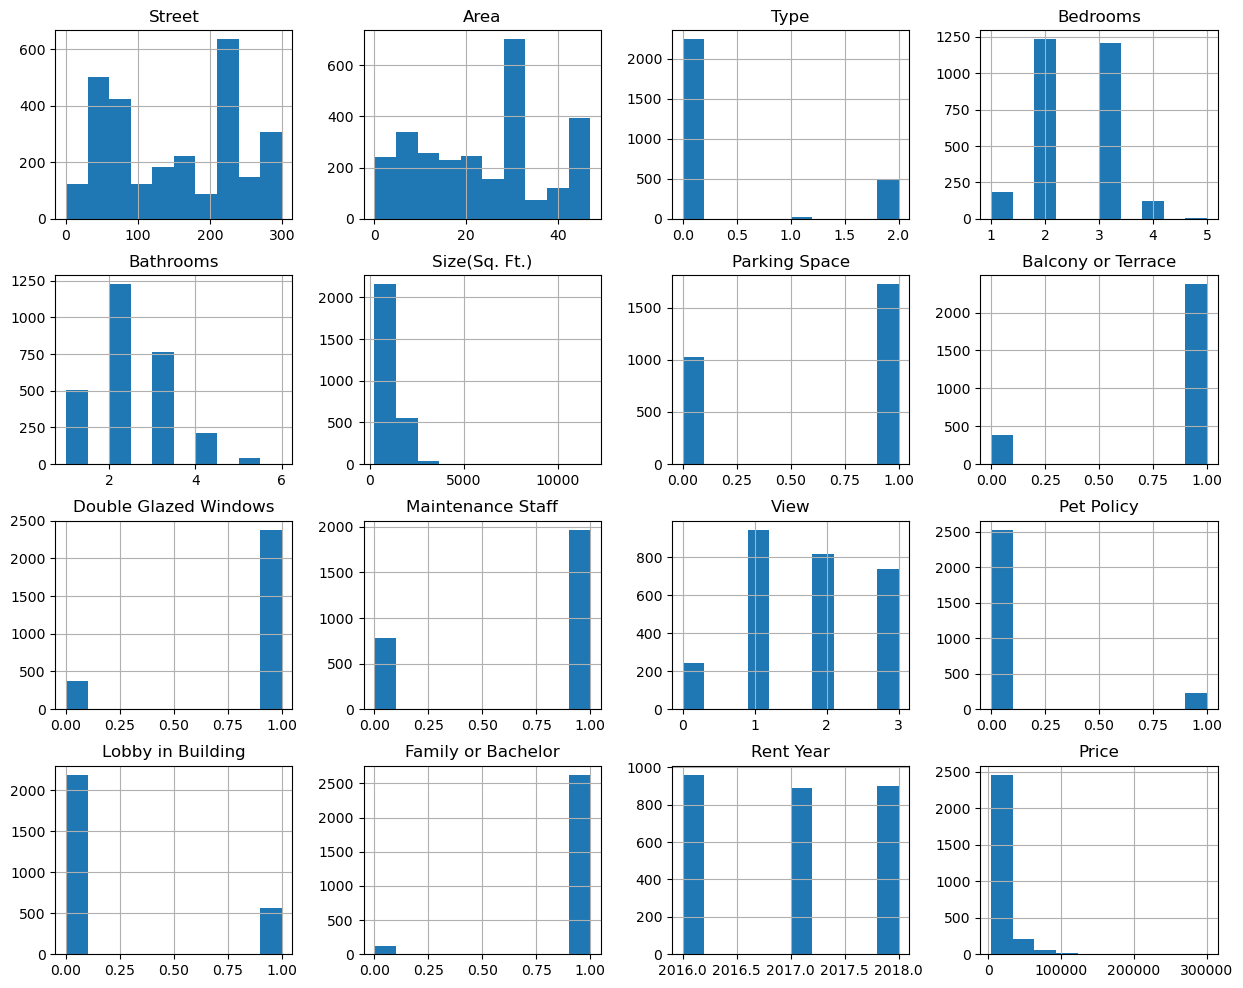

In [27]:
train_data = X_train.join(y_train)
train_data.hist(figsize = (15, 12))
plt.show()

In [ ]:
X_train, y_train = train_data.drop(['Price'], axis=1), train_data['Price']
test_data = X_test.join(y_test)
X_test, y_test = test_data.drop(['Price'], axis=1), test_data['Price']

## Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression();

linear.fit(X_train, y_train)

LinearRegression()

In [30]:
linear.score(X_test, y_test)

0.6641007944914316

## Logistic Regression